<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Black_Friday_Sales_Prediction_Nishu_Project10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'
### Batch: 18th July
### Project10 : Black Friday Sales Prediction using Machine Learning
### Dataset Link: https://www.dropbox.com/s/b173516z9mye1z7/BlackFridaySalesPrediction.csv?dl=1

In [1]:
pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.2 MB 1.2 MB/s 


### Importing Libraries

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the csv dataset

In [45]:
df=pd.read_csv('/content/sample_data/BlackFridaySalesPrediction.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [46]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [47]:
df.shape

(550068, 12)

In [48]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [50]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [51]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61bf13df90>,
      dtype=object)

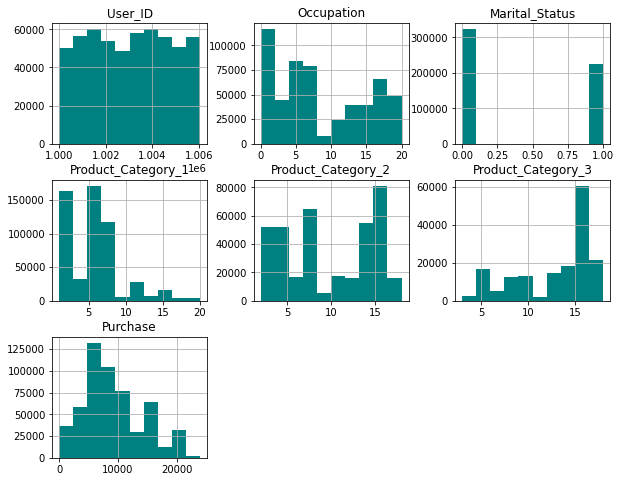

In [52]:
df.hist(figsize=(10,8), color = 'teal')

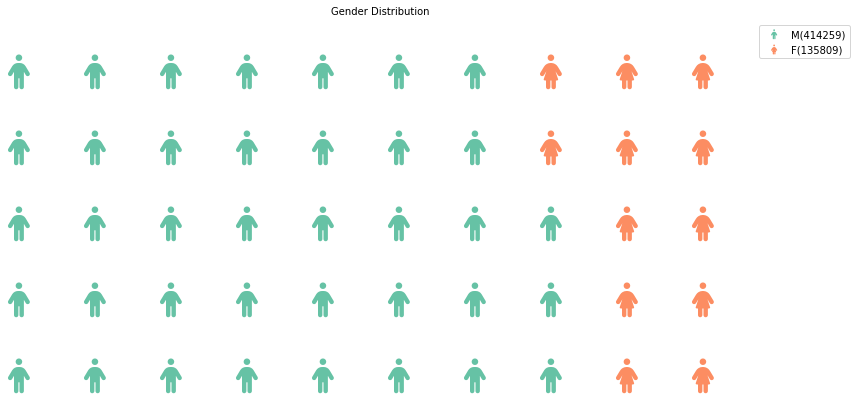

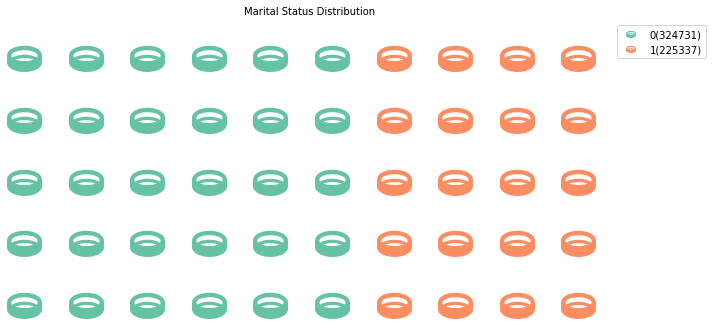

In [53]:
from pywaffle import Waffle
gender = df['Gender'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=gender,
    title={'label': 'Gender Distribution', 'loc': 'center','size':10},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35, 
    icons = ['male','female'],
    icon_legend=True,
    figsize=(12, 8)
)
Marital_Status = df['Marital_Status'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=Marital_Status,
    title={'label': 'Marital Status Distribution', 'loc': 'center','size':10},
    labels=["{}({})".format(a, b) for a, b in zip(Marital_Status.index, Marital_Status) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35,
    icons = 'ring',
    icon_legend=True,
    figsize=(10, 8)
)

Text(0.5, 1.0, 'Gender vs Marital Status Purchase Distribution')

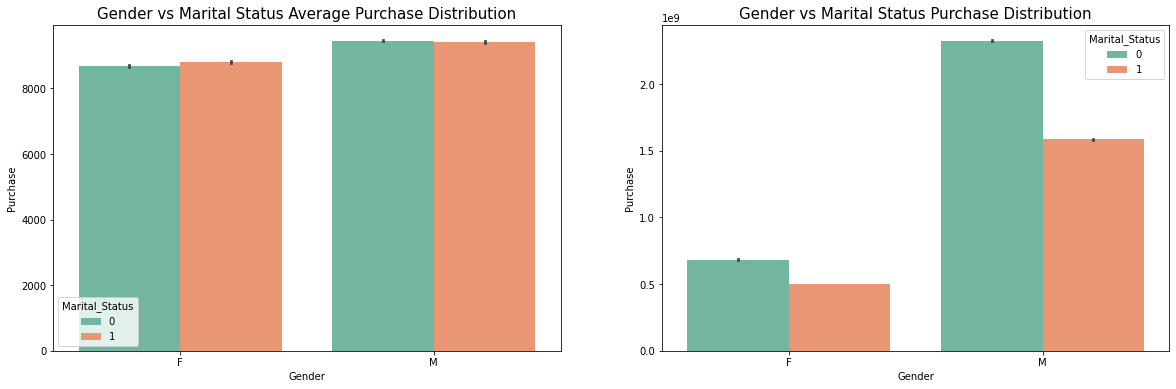

In [54]:
fig,ax = plt.subplots(figsize=(20,6),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=df,ax=ax[0] , palette="Set2").set_title(label = 'Gender vs Marital Status Average Purchase Distribution', size =15)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.sum,data=df,ax=ax[1] , palette="Set2").set_title(label = 'Gender vs Marital Status Purchase Distribution', size =15)

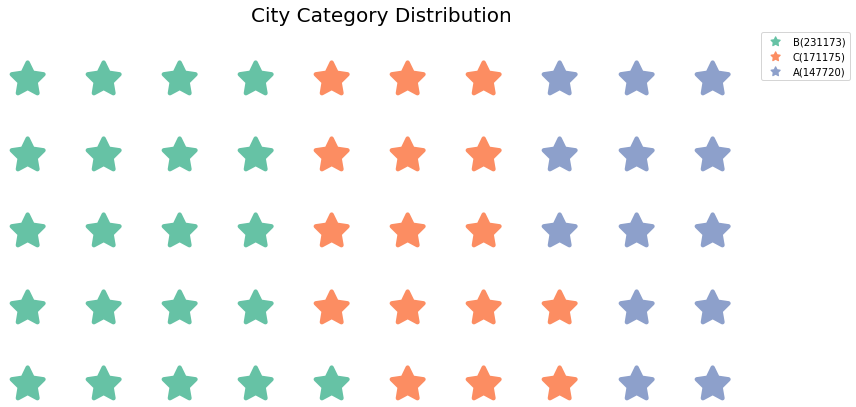

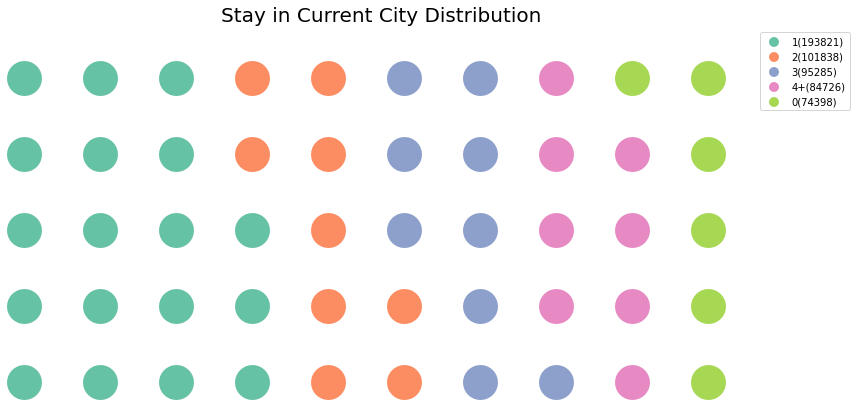

In [55]:
City = df['City_Category'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=City,
    title={'label': 'City Category Distribution', 'loc': 'center','size':20},
    labels=["{}({})".format(a, b) for a, b in zip(City.index, City) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35,
    icons = 'star',
    icon_legend=True,
    figsize=(12, 8)
)

Stay = df['Stay_In_Current_City_Years'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=Stay,
    title={'label': 'Stay in Current City Distribution', 'loc': 'center','size':20},
    labels=["{}({})".format(a, b) for a, b in zip(Stay.index, Stay) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35,
    icons = 'circle', 
    icon_legend=True,
    figsize=(12, 8)
)

Text(0.5, 1.0, 'City Category vs Stay in Current City Purchases Distribution')

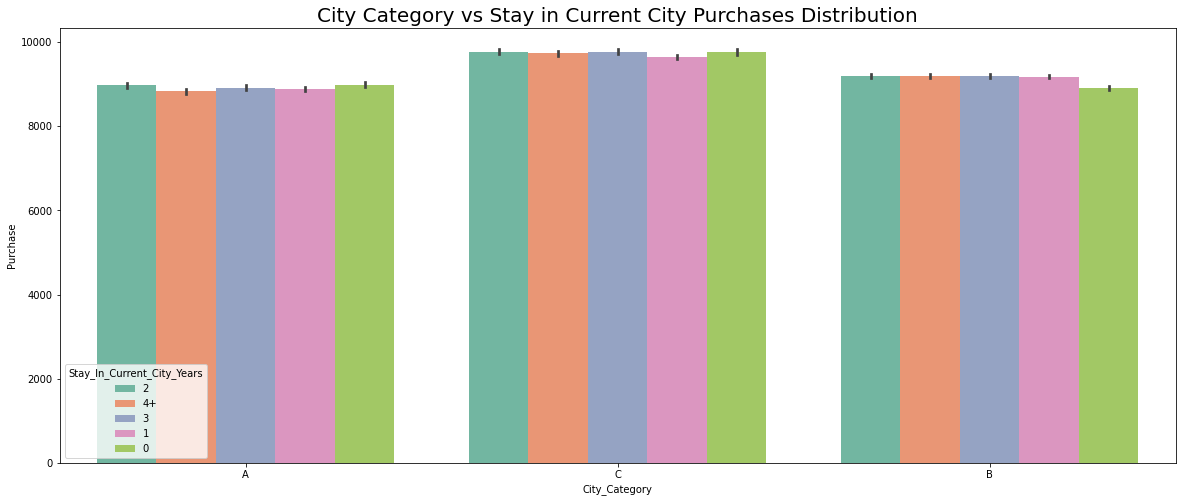

In [56]:
fig,ax = plt.subplots(figsize=(20,8),ncols=1,nrows=1)
sns.barplot(x="City_Category",y="Purchase",hue="Stay_In_Current_City_Years",estimator=np.mean,data=df, palette="Set2").set_title(label = 'City Category vs Stay in Current City Purchases Distribution', size =20)

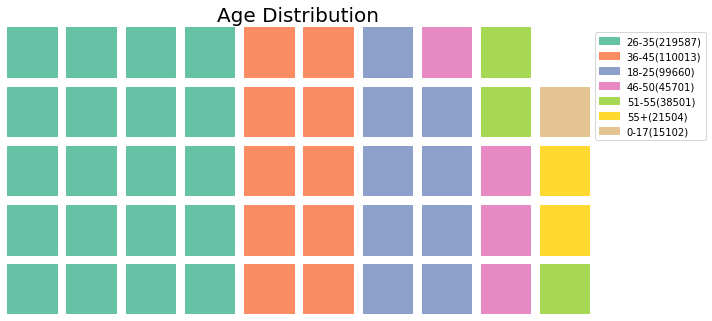

In [57]:
Age = df['Age'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=10,
    values=Age,
    title={'label': 'Age Distribution', 'loc': 'center','size':20},
    labels=["{}({})".format(a, b) for a, b in zip(Age.index, Age) ],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    font_size=35,
    icon_legend=True,
    figsize=(10, 8)
)

<function matplotlib.pyplot.show(*args, **kw)>

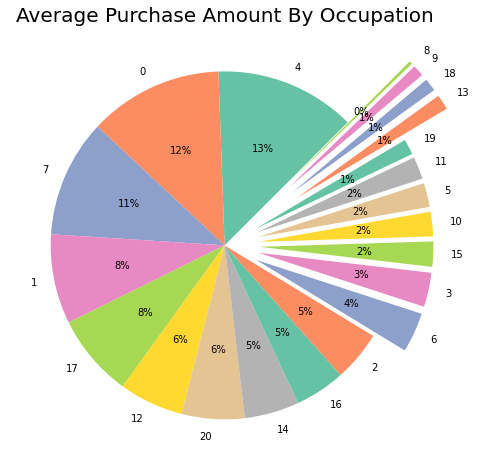

In [58]:
Occupation_percent =df.groupby('Occupation').Purchase.agg(['sum'])
Occupation_percent=Occupation_percent.apply(lambda x: 100 * x / float(x.sum())).reset_index()
Occupation_percent=Occupation_percent.sort_values(by = ['sum'],ascending=False)
explode = (0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.5,0.5,0.5,0.5)
plt.figure(figsize=(10,8))
plt.pie(Occupation_percent['sum'],labels=Occupation_percent['Occupation'], explode= explode,autopct='%1.0f%%', counterclock=True,startangle=45, colors = sns.color_palette('Set2'))
plt.title(label= 'Average Purchase Amount By Occupation', loc = 'center', size = 20)
plt.show

Text(0.5, 1.0, 'Occupation vs Average Purchase Distribution')

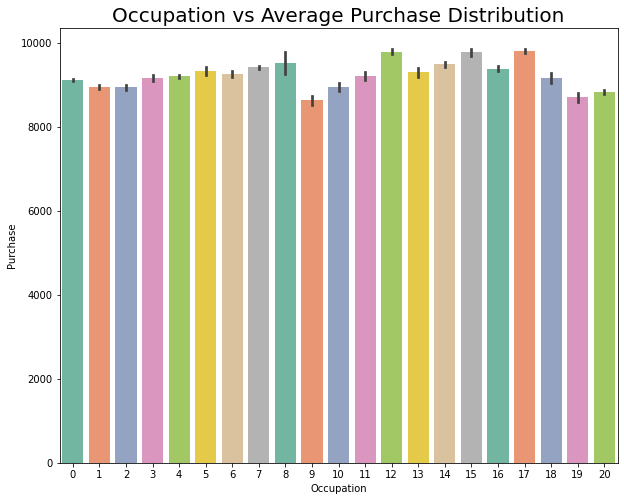

In [59]:
fig,ax = plt.subplots(figsize=(10,8),ncols=1,nrows=1)
sns.barplot(x="Occupation",y="Purchase",estimator=np.mean,data=df, palette="Set2").set_title(label = 'Occupation vs Average Purchase Distribution', size =20)

In [60]:
df[['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase']]=df[['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Purchase']].fillna(0)

In [61]:
df['Product_Category_2'].fillna(value=df['Product_Category_2'].mean(), inplace=True)

In [62]:
df['Product_Category_3'].fillna(value=df['Product_Category_3'].mean(), inplace=True)

In [63]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [64]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [65]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [66]:
df['Age']=(df['Age'].str.strip('+'))

In [67]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [68]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 42.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


### Plotting heat map

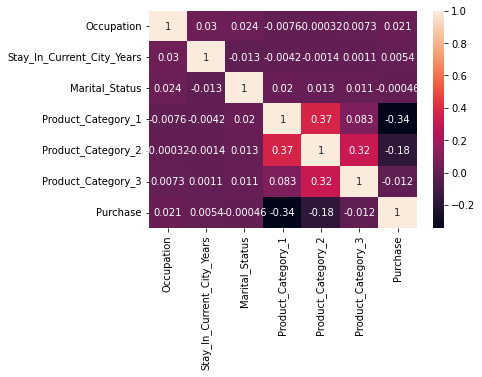

In [69]:
sns.heatmap(
    df.corr(),
    annot=True
)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


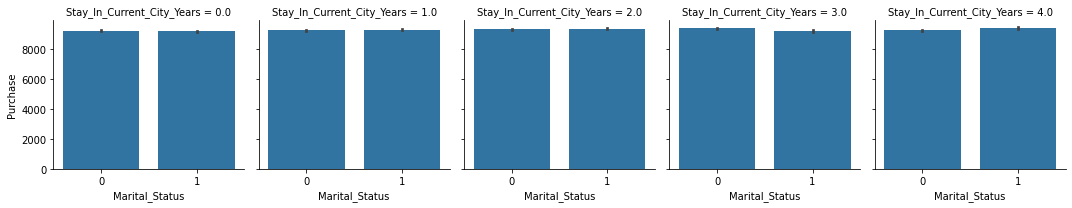

In [70]:
g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

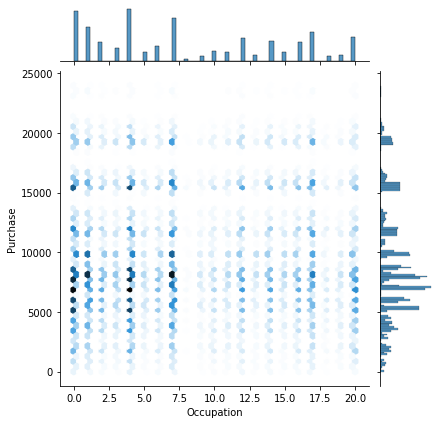

In [71]:
sns.jointplot(x='Occupation',y='Purchase',
              data=df, kind='hex'
             )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


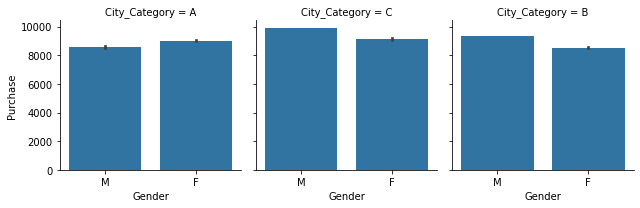

In [72]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


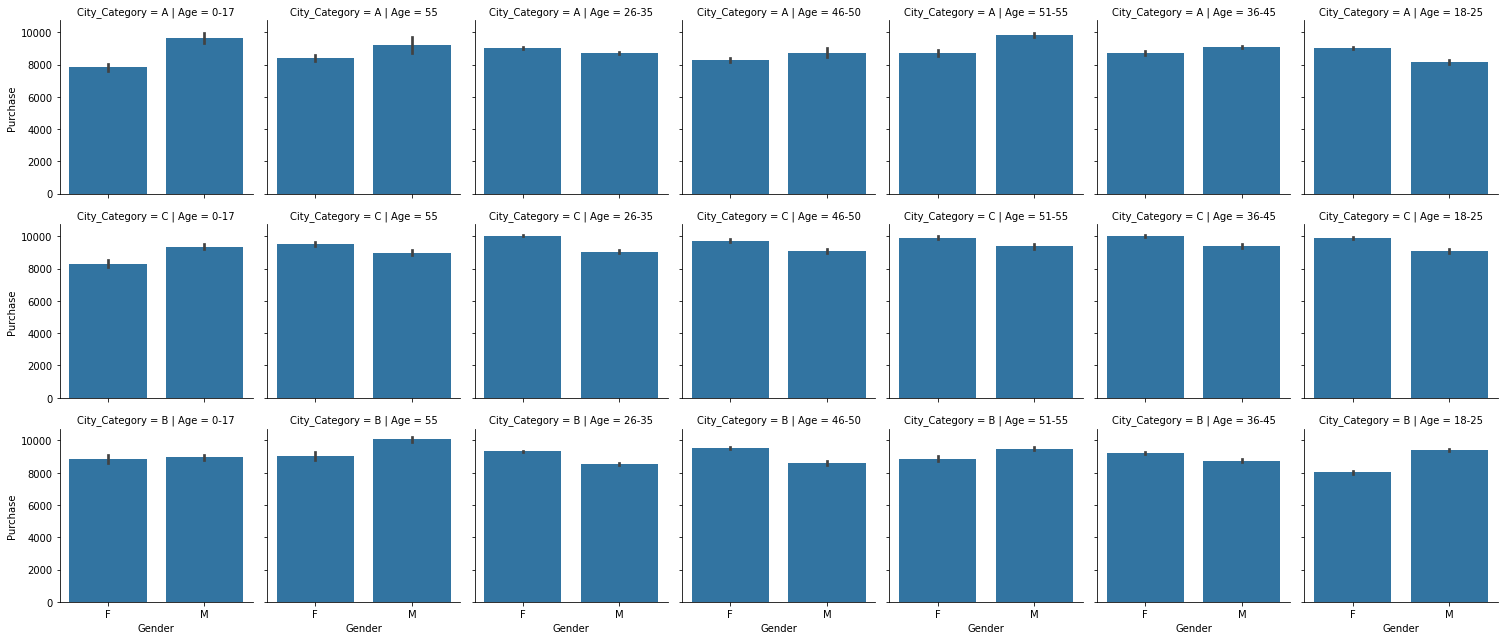

In [73]:
g = sns.FacetGrid(df,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

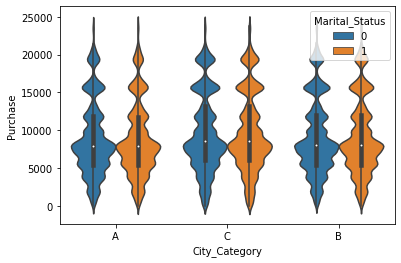

In [74]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=df)

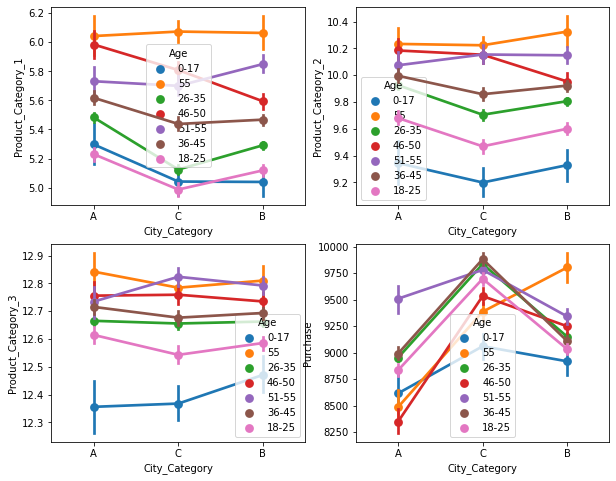

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,1]
                )

### Dividing the data into test and train datasets

In [76]:
#Dividing the data into test and train datasets
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [79]:
y_train

array([ 8109, 10071,  2290, ...,  6991, 13251,  9905])

In [80]:
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [81]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [83]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       [1, '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       [1, '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [84]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [85]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [86]:
labelencoder_X_test = LabelEncoder()
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [87]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[1, '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       [1, '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       [1, '36-45', 0, ..., 1, 2.0, 16.0],
       [1, '26-35', 7, ..., 1, 2.0, 9.0],
       [1, '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [88]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [89]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [90]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [91]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [92]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [93]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2824
Max leaf nodes: 50  		 Mean Absolute Error:  2243
Max leaf nodes: 100  		 Mean Absolute Error:  2217
Max leaf nodes: 300  		 Mean Absolute Error:  2196
Max leaf nodes: 500  		 Mean Absolute Error:  2190
Max leaf nodes: 700  		 Mean Absolute Error:  2186
Max leaf nodes: 800  		 Mean Absolute Error:  2185
Max leaf nodes: 850  		 Mean Absolute Error:  2184


In [94]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

In [95]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [96]:
y_pred

array([15584.7       ,  1279.68333333, 16316.63      , ...,
       16002.91944444, 14401.41040404, 16630.63333333])

# **THANK YOU.......))**